## Keras 

There are many other NLP tools than NLTK. Keras is a DL framework, that also have some NLP tools, specially for tokenization.


But it suffers the same issues as split() on white spaces:

In [1]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'human-like robots are dump, but cute' # 'The quick brown fox jumped over the lazy dog.'
# Tokenize The Document
result = text_to_word_sequence(text)
print('The tokenize document is --> ',result)

The tokenize document is -->  ['human', 'like', 'robots', 'are', 'dump', 'but', 'cute']


# Text preparation

The preparation phase includes transforming __text__ into __binary/integer/digital format__

For that we need a vocabulary vector:

# Vocab and inverse vocab

Vocabulary is a mapping (dict) from words to indices (integers). It represents ALL the words in a language. But it's hard to get ALL words, so we count only what we have in a dataset/corpus. 

Since we don't account for all words, we might encounter Out-Of-Vocab words which we dont know a mapping for. So we usually reserve a special token index for UNKnown words.

# First ==> Load Data

In [2]:
from pathlib import Path
import os
DATA_PATH = Path('./dat/')
DATA_PATH.mkdir(exist_ok =True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

In [3]:
import numpy as np
CLASSES = ['neg' ,'pos'] #,'unsup']
PATH=Path('./dat/aclImdb/')
def get_texts(path):
  texts ,labels = [] ,[]
  for idx , label in enumerate(CLASSES):
    for fname in (path/label).glob('*.*'):
      #texts.append(fixup(fname.open('r',encoding='utf-8').read()))
      texts.append(fname.open('r', encoding='utf-8').read())
      labels.append(idx)
      #return np.array(texts), np.array(labels)
      return texts , labels

In [4]:
train_text , train_labels =get_texts(PATH/'train')
test_text  , test_labels  =get_texts(PATH/'test')

# Manual

In [5]:
texts = train_text + test_text
words = [word for text in texts for word in text.split()]
v =sorted(list(set(words)))
v

['A',
 'Ashton',
 'Aside',
 'Costner',
 "Costner's",
 'Costner.',
 'Even',
 'Finally',
 'Forrest',
 'Frederic',
 'Future',
 'His',
 'I',
 'Kirkland',
 'Kutcher',
 "Kutcher's",
 'Kutcher.',
 'Most',
 'Mr.',
 'No',
 'On',
 'Once',
 'Sally',
 'Shakespeare',
 'Starts',
 'Story',
 'The',
 'Unfortunately',
 'Vilmos',
 'WHOLE',
 'We',
 'Zsigmond.',
 'a',
 'about',
 'absurd',
 'again',
 'all',
 'an',
 'and',
 'any',
 'anyone',
 'appears',
 'are',
 'around',
 'as',
 'audience',
 'be',
 'best',
 'better',
 'briefly.',
 'by',
 'can',
 'care',
 'care.',
 'chantings',
 'character',
 'characters.',
 'cinematography',
 'closet,',
 'closet.',
 'cluttered',
 'cocky,',
 'comedy.',
 'comes',
 'could',
 'crazy',
 'cryptic',
 'dialogue',
 'did',
 'do',
 'dragged',
 'driven',
 'early',
 'easy',
 'else',
 'era',
 'eventually',
 'example',
 'far',
 'feelings',
 'few',
 'for',
 'foreshadowing.',
 'forgotten',
 'formal',
 'from',
 'future',
 'general',
 'ghosts',
 'ghosts.',
 'good',
 'grader.',
 'great',
 'hal

* **String To Index**
* **Index To String**

In [8]:
str2idx ={w:i for i,w in enumerate(v)}
idx2str ={i:w for i,w in enumerate(v)}
# or int2str = dict([(value, key) for (key, value) in str2int.items()])

If we want word_counts and ordered dict str2idx (same in keras Tokenizer)

In [9]:
from collections import Counter
word_counts = Counter(words)
print(word_counts.most_common(3))
v_s = sorted(word_counts.items(), key=lambda x: x[1],  reverse=True)
str2idx = {key:val for key,val in v_s}
idx2str = {val:key for key,val in v_s}
str2idx

[('a', 9), ('of', 8), ('the', 8)]


{'a': 9,
 'of': 8,
 'the': 8,
 'is': 5,
 'with': 4,
 'it': 4,
 'be': 4,
 'to': 4,
 'and': 4,
 'are': 4,
 'by': 3,
 'no': 3,
 'off': 3,
 'from': 3,
 'The': 3,
 'than': 3,
 'I': 3,
 'about': 3,
 'who': 2,
 'has': 2,
 'for': 2,
 'out': 2,
 'terrific': 2,
 'absurd': 2,
 'turned': 2,
 'an': 2,
 "it's": 2,
 'time': 2,
 'just': 2,
 'should': 2,
 'better': 2,
 'Costner': 2,
 'which': 2,
 'very': 2,
 'did': 2,
 'not': 2,
 'care': 2,
 'us': 2,
 'character': 2,
 'we': 2,
 'all': 2,
 'Story': 1,
 'man': 1,
 'unnatural': 1,
 'feelings': 1,
 'pig.': 1,
 'Starts': 1,
 'opening': 1,
 'scene': 1,
 'that': 1,
 'example': 1,
 'comedy.': 1,
 'A': 1,
 'formal': 1,
 'orchestra': 1,
 'audience': 1,
 'into': 1,
 'insane,': 1,
 'violent': 1,
 'mob': 1,
 'crazy': 1,
 'chantings': 1,
 'singers.': 1,
 'Unfortunately': 1,
 'stays': 1,
 'WHOLE': 1,
 'general': 1,
 'narrative': 1,
 'eventually': 1,
 'making': 1,
 'too': 1,
 'putting.': 1,
 'Even': 1,
 'those': 1,
 'era': 1,
 'off.': 1,
 'cryptic': 1,
 'dialogue': 1,

## Binarization/vecotrization

We can use any given vocab dict to binarize text and come back. This maps exactly to keras texts_to_sequences

In [10]:
s = 'a movie'
l = [str2idx[w] for w in s.split()]
l

[9, 1]

**For a full corpus (list of docs) like texts_to_sequences:**

In [11]:
docs = ['a movie ', 'well magic']
l = [[str2idx[w] for w in s.split()] for s in docs]
l

[[9, 1], [1, 1]]

**To reverse back, we use the reverse mapping:**

In [12]:
s = [' '.join([idx2str[i] for i in d]) for d in l]
s

['a in.', 'in. in.']

## Keras Tokenizer

The keras tokenizer can be used to convert a sequence of words into integers. 

It builds an internal vocab, called `word_index`.



To use a tokenizer, you must first `fit` it to the texts. It learns some stats about the text this way.

__It's advised to fit the tokenizer on all the data (train+test) to avoid OOV__

This is not "cheating" and not leading to overfitting, as we don't use the test labels, but only the raw text features (unsupervised)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
texts = train_text + test_text
texts[:10]

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I

* `fit_on_texts` -->  is a method in the Tokenizer class from the tensorflow.keras.preprocessing.text module.
*  It is used to update the internal vocabulary of the tokenizer based on a list of texts.



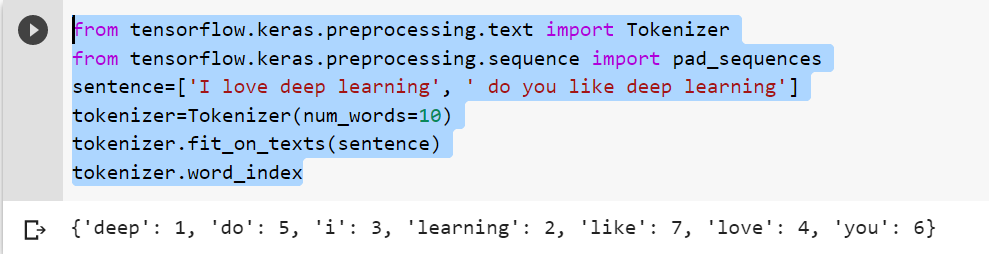

In [21]:
# Example
from keras.preprocessing.text import Tokenizer

# Create a tokenizer object
tokenizer = Tokenizer()

# List of texts
texts = ['This is the first text.', 'This text is the second one.', 'And this is the third text.']

# Update the vocabulary based on the texts
tokenizer.fit_on_texts(texts)
tokenizer.word_index

{'this': 1,
 'is': 2,
 'the': 3,
 'text': 4,
 'first': 5,
 'second': 6,
 'one': 7,
 'and': 8,
 'third': 9}

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
texts = train_text + test_text
texts[:10]

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I

In [15]:

tok = Tokenizer(texts)
tok.fit_on_texts(texts)
tok.word_index

{'the': 1,
 'a': 2,
 'of': 3,
 'is': 4,
 'with': 5,
 'it': 6,
 'no': 7,
 'off': 8,
 'be': 9,
 'to': 10,
 'and': 11,
 'are': 12,
 'by': 13,
 'from': 14,
 'than': 15,
 'costner': 16,
 'i': 17,
 'care': 18,
 'about': 19,
 'we': 20,
 'who': 21,
 'has': 22,
 'for': 23,
 'out': 24,
 'terrific': 25,
 'absurd': 26,
 'turned': 27,
 'an': 28,
 "it's": 29,
 'time': 30,
 'just': 31,
 'should': 32,
 'on': 33,
 'better': 34,
 'future': 35,
 'which': 36,
 'very': 37,
 'did': 38,
 'not': 39,
 'us': 40,
 'ghosts': 41,
 'in': 42,
 'closet': 43,
 'character': 44,
 'kutcher': 45,
 'all': 46,
 'story': 47,
 'man': 48,
 'unnatural': 49,
 'feelings': 50,
 'pig': 51,
 'starts': 52,
 'opening': 53,
 'scene': 54,
 'that': 55,
 'example': 56,
 'comedy': 57,
 'formal': 58,
 'orchestra': 59,
 'audience': 60,
 'into': 61,
 'insane': 62,
 'violent': 63,
 'mob': 64,
 'crazy': 65,
 'chantings': 66,
 'singers': 67,
 'unfortunately': 68,
 'stays': 69,
 'whole': 70,
 'general': 71,
 'narrative': 72,
 'eventually': 73,
 '

In [29]:
'''#Example 
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
# Define the text corpus
texts = ['I love apples', 'I hate oranges', 'Bananas are tasty']
# Create a tokenizer with oov_token='UNK'
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(texts)
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)
# Demonstrate handling OOV words
test_text = 'I like grapes and pears'
test_sequence = tokenizer.texts_to_sequences([test_text])
print(test_sequence) #  [[2, 1, 1, 1, 1]]'''     

"#Example \nfrom tensorflow import keras\nfrom tensorflow.keras.preprocessing.text import Tokenizer\n# Define the text corpus\ntexts = ['I love apples', 'I hate oranges', 'Bananas are tasty']\n# Create a tokenizer with oov_token='UNK'\ntokenizer = Tokenizer(oov_token='UNK')\ntokenizer.fit_on_texts(texts)\n# Convert text to sequences\nsequences = tokenizer.texts_to_sequences(texts)\n# Demonstrate handling OOV words\ntest_text = 'I like grapes and pears'\ntest_sequence = tokenizer.texts_to_sequences([test_text])\nprint(test_sequence) #  [[2, 1, 1, 1, 1]]"

* **We could fit the tokenizer with an `OOV` token, which will be added to `word_index` and given**

* `The oov_token='UNK'` -->  is a parameter used in Natural Language Processing (NLP) tasks, particularly in text tokenization.
* `"UNK"` --> stands for "unknown" and is used to represent out-of-vocabulary (OOV) words or tokens.
* `OOV` -->  words are the ones that are not present in the vocabulary or training data of a language model.

In [16]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)